In [1]:
import numpy as np
import matplotlib.pyplot as plt

from monte_carlo import run_episode
from temporal_difference import SARSA, QLeaner
from envs.gridworld import GridworldEnv
from utils.grid_visualization import visualize_value_function, visualize_policy

np.random.seed(0)

In [2]:
from gym.envs.toy_text import CliffWalkingEnv

In [3]:
env = CliffWalkingEnv()

In [68]:
sarsa_agent = SARSA(gamma=.9,
                    lr=1e-1,
                    num_states=env.nS,
                    num_actions=env.nA,
                    epsilon=0.1)

In [71]:
num_eps = 10000
report_every = 1000
sarsa_qs = []
iter_idx = []
sarsa_rewards = []


for i in range(num_eps):
    
    reward_sum = 0
    env.reset()    
    while True:
        state = env.s
        action = sarsa_agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        
        sarsa_agent.update_sample(state=state,
                                 action=action,
                                 reward=reward,
                                 next_state=next_state,
                                 done=done)
        reward_sum += reward
        if done:
            break
    
    sarsa_rewards.append(reward_sum)
    
    if i % report_every == 0:
        print("Running {} th episode".format(i))
        print("Reward sum : {}".format(reward_sum))
        sarsa_qs.append(sarsa_agent.q.copy())
        iter_idx.append(i)

Running 0 th episode
Reward sum : -15
Running 1000 th episode
Reward sum : -18
Running 2000 th episode
Reward sum : -19
Running 3000 th episode
Reward sum : -17
Running 4000 th episode
Reward sum : -21
Running 5000 th episode
Reward sum : -19
Running 6000 th episode
Reward sum : -18
Running 7000 th episode
Reward sum : -19
Running 8000 th episode
Reward sum : -20
Running 9000 th episode
Reward sum : -17


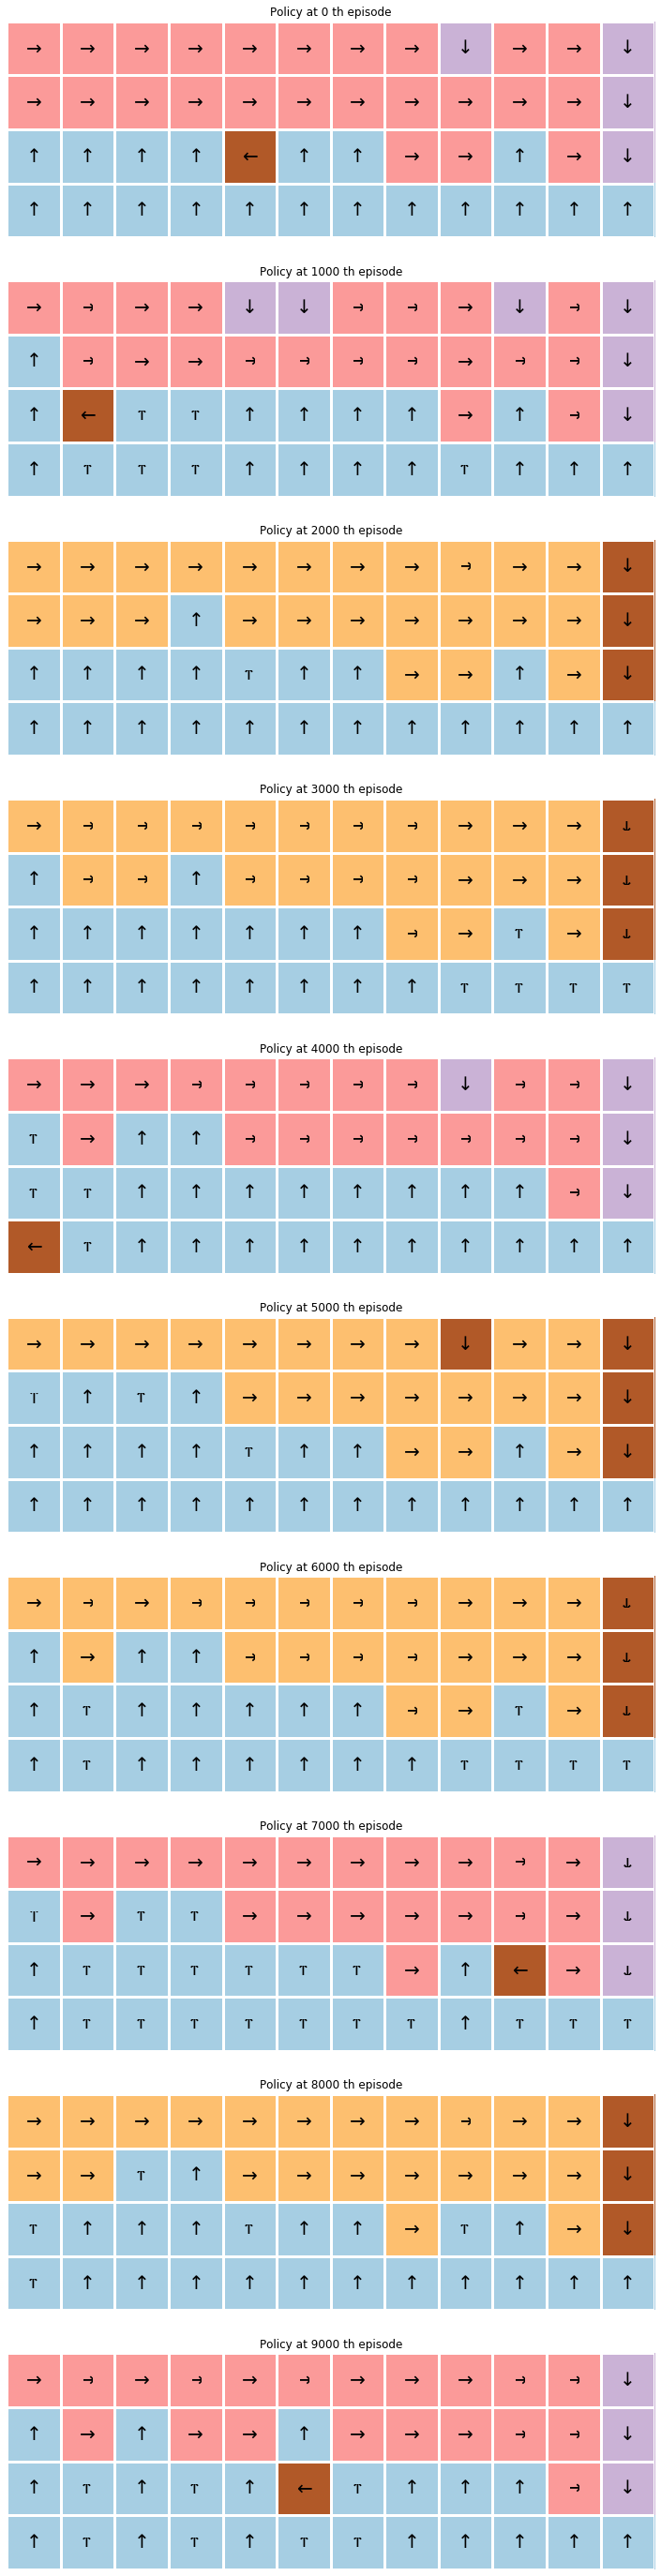

In [72]:
num_plots = len(sarsa_qs)
fig, ax = plt.subplots(num_plots, figsize=(num_plots*5*5, num_plots*5))
for i, (q, viz_i) in enumerate(zip(sarsa_qs, iter_idx)):
    visualize_policy(ax[i], q, env.shape[0], env.shape[1])
    _ = ax[i].set_title("Policy at {} th episode".format(viz_i))

In [73]:
q_agent = QLeaner(gamma=.9,
                  lr=1e-1,
                  num_states=env.nS,
                  num_actions=env.nA,
                  epsilon=0.1)

In [74]:
num_eps = 10000
report_every = 1000
qs = []
iter_idx = []
qlearning_rewards = []


for i in range(num_eps):
    
    reward_sum = 0
    env.reset()    
    while True:
        state = env.s
        action = q_agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        
        q_agent.update_sample(state=state,
                                 action=action,
                                 reward=reward,
                                 next_state=next_state,
                                 done=done)
        reward_sum += reward
        if done:
            break
            
    qlearning_rewards.append(reward_sum)
    
    if i % report_every == 0:
        print("Running {} th episode".format(i))
        print("Reward sum : {}".format(reward_sum))
        qs.append(q_agent.q.copy())
        iter_idx.append(i)

Running 0 th episode
Reward sum : -102
Running 1000 th episode
Reward sum : -13
Running 2000 th episode
Reward sum : -20
Running 3000 th episode
Reward sum : -122
Running 4000 th episode
Reward sum : -329
Running 5000 th episode
Reward sum : -13
Running 6000 th episode
Reward sum : -116
Running 7000 th episode
Reward sum : -15
Running 8000 th episode
Reward sum : -13
Running 9000 th episode
Reward sum : -15


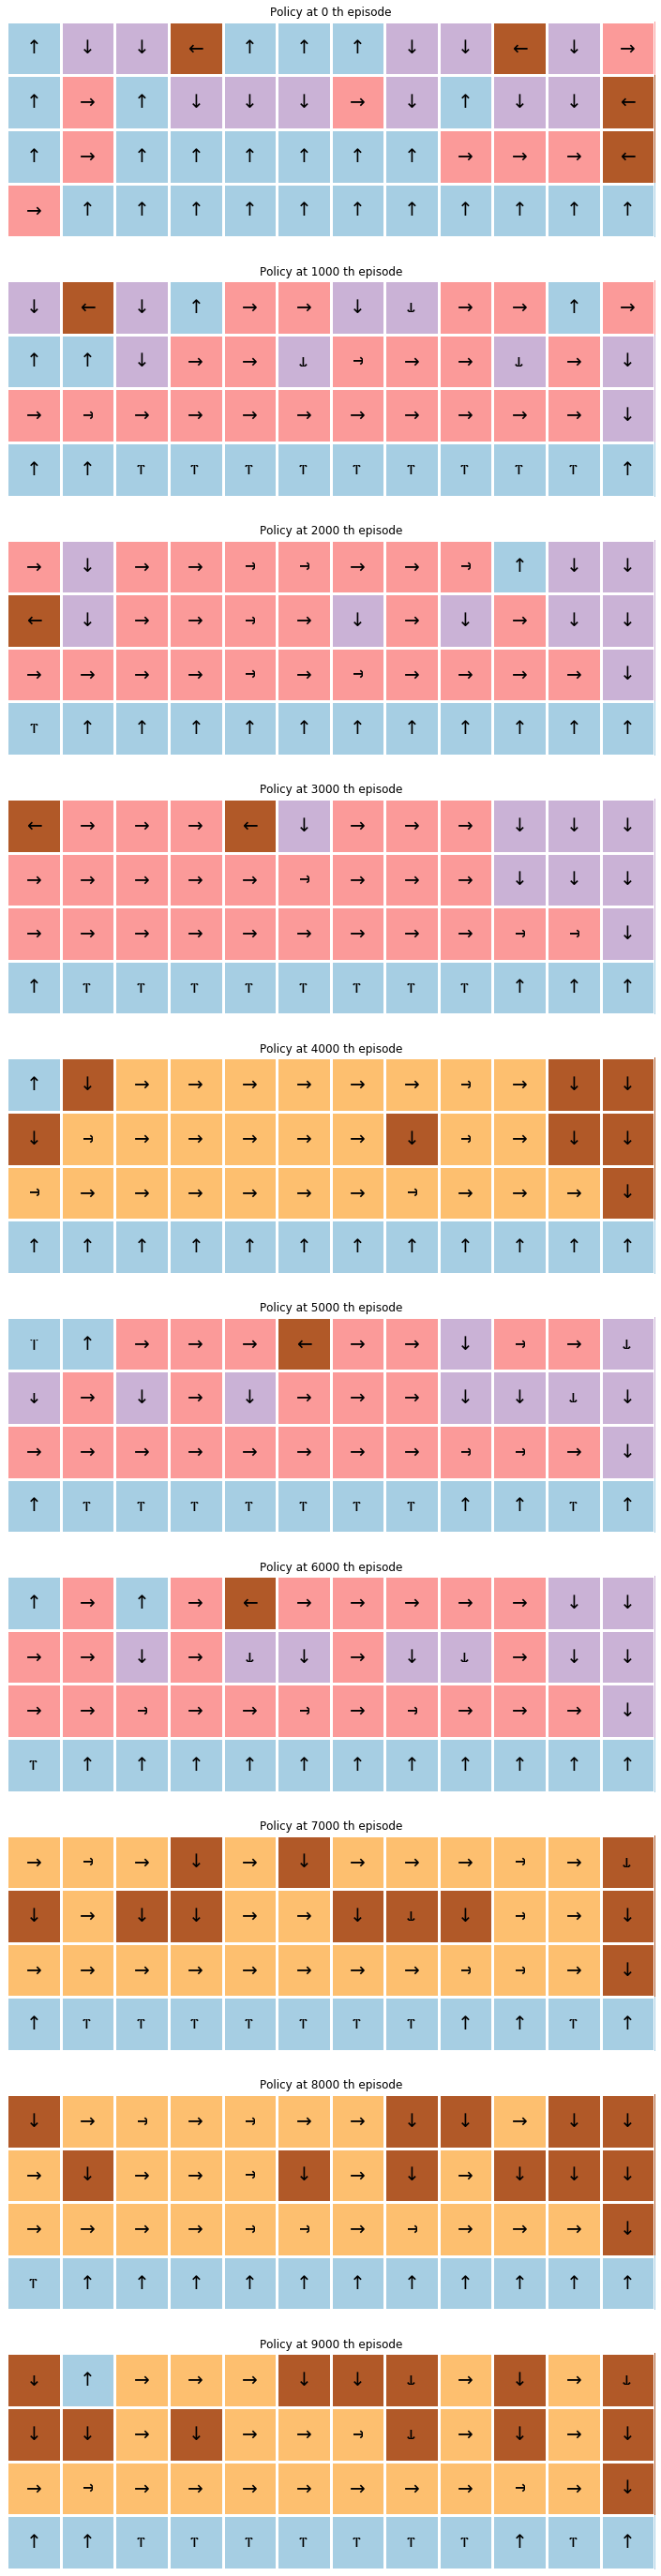

In [75]:
num_plots = len(qs)
fig, ax = plt.subplots(num_plots, figsize=(num_plots*5*5, num_plots*5))
for i, (q, viz_i) in enumerate(zip(qs, iter_idx)):
    visualize_policy(ax[i], q, env.shape[0], env.shape[1])
    _ = ax[i].set_title("Policy at {} th episode".format(viz_i))

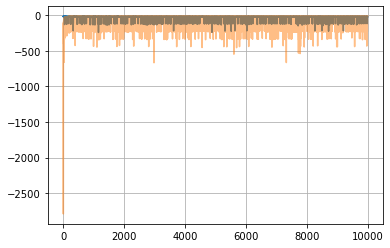

In [76]:
fig, ax = plt.subplots(1,1)
ax.grid()
ax.plot(sarsa_rewards)
ax.plot(qlearning_rewards, alpha=0.5)
#ax.set_ylim(-50, 0)